In this following, I'll show a few examples of how to generate and fit transit ephemerides.

In [27]:
%matplotlib inline

import numpy as np
from numpy import polyfit, polyval
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Boise State official colors - https://www.boisestate.edu/brand/visual-identity/colors/ 
BoiseState_blue = "#0033A0"
BoiseState_orange = "#D64309"
aspect_ratio = 16./9.

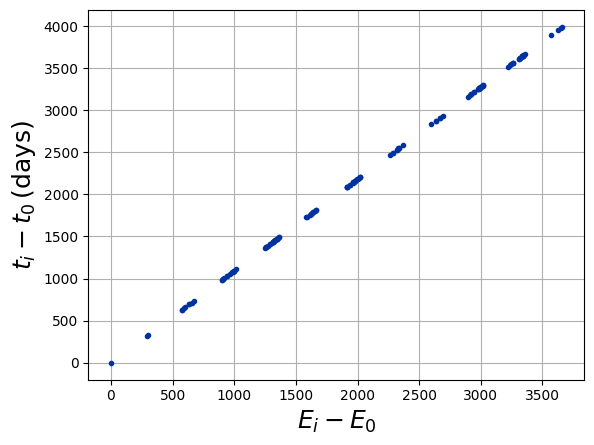

In [14]:
# Let's start by reading in a real dataset.
data = np.genfromtxt("WASP12b_transit_ephemeris.csv", delimiter=',', names=True)

plt.errorbar(data["epoch"] - np.min(data["epoch"]), data["transit_time"] - np.min(data["transit_time"]), 
             yerr=data["sigma_transit_time"], marker='.', ls='', color=BoiseState_blue)
plt.xlabel(r'$E_i - E_0$', fontsize=18)
plt.ylabel(r'$t_i - t_0\,\left( {\rm days} \right)$', fontsize=18)
plt.grid(True)

In [36]:
# I'll demonstrate a couple of ways to fit the transit data.
def lin_fit(x, P, T0):
    return P*x + T0

def quad_fit(x, dPdE, P, T0):
    return 0.5*dPdE*x*x + P*x + T0

x = data["epoch"] - np.min(data["epoch"])
y = data["transit_time"] - np.min(data["transit_time"])
yerr = data["sigma_transit_time"]

# Fit a linear ephemeris with polyfit
popt, pcov = polyfit(x, y, 1, w=1./yerr, cov=True)
unc = np.sqrt(np.diag(pcov))
print("polyfit linear")
print("P = (%g +- %g) days" % (popt[0], unc[0]))
print("T0 = (%g +- %g) days" % (popt[1], unc[1]))
print()

# Fit a quadratic ephemeris with polyfit
popt, pcov = polyfit(x, y, 2, w=1./yerr, cov=True)
unc = np.sqrt(np.diag(pcov))
print("polyfit quadratic")
print("dPdE = (%g +- %g) days" % (popt[0], unc[0]))
print("P = (%g +- %g) days" % (popt[1], unc[1]))
print("T0 = (%g +- %g) days" % (popt[2], unc[2]))
print()

# Fit a linear ephemeris with curve_fit
popt, pcov = curve_fit(lin_fit, x, y, sigma=yerr, absolute_sigma=True)
unc = np.sqrt(np.diag(pcov))
print("curve_fit linear")
print("P = (%g +- %g) days" % (popt[0], unc[0]))
print("T0 = (%g +- %g) days" % (popt[1], unc[1]))
print()

# Fit a quadratic ephemeris with curve_fit
popt, pcov = curve_fit(quad_fit, x, y, sigma=yerr, absolute_sigma=True)
unc = np.sqrt(np.diag(pcov))
print("curve_fit linear")
print("dPdE = (%g +- %g) days" % (popt[0], unc[0]))
print("P = (%g +- %g) days" % (popt[1], unc[1]))
print("T0 = (%g +- %g) days" % (popt[2], unc[2]))

polyfit linear
P = (1.09142 +- 4.67777e-08) days
T0 = (0.00219511 +- 0.000102708) days

polyfit quadratic
dPdE = (-3.92728e-10 +- 5.056e-11) days
P = (1.09142 +- 2.16672e-07) days
T0 = (0.000755136 +- 0.000204273) days

curve_fit linear
P = (1.09142 +- 2.75064e-08) days
T0 = (0.00219524 +- 6.03514e-05) days

curve_fit linear
dPdE = (-7.87999e-10 +- 7.11532e-11) days
P = (1.09142 +- 1.537e-07) days
T0 = (0.000751544 +- 0.00014544) days
